<a href="https://colab.research.google.com/github/ahmadayoubi404/Deep-Learning/blob/main/5_Malaria_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# **Data** **Preparation**

In [ ]:
dataset, dataset_info = tfds.load(('malaria'), with_info=True, as_supervised = True, shuffle_files = True, split = ['train'])

In [ ]:
for data in dataset[0].take(2):
    print(data)

In [ ]:
import tensorflow as tf

# Define the dataset
dataset1 = tf.data.Dataset.range(10)
print("Original Dataset:", list(dataset1.as_numpy_iterator()))

# Define the splitting ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate the sizes
dataset_size = len(list(dataset1.as_numpy_iterator()))
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

# Create the datasets using take() and skip()
train_dataset = dataset1.take(train_size)
print("Train Dataset:", list(train_dataset.as_numpy_iterator()))

val_dataset = dataset1.skip(train_size).take(val_size)
print("Validation Dataset:", list(val_dataset.as_numpy_iterator()))

test_dataset = dataset1.skip(train_size + val_size)
print("Test Dataset:", list(test_dataset.as_numpy_iterator()))


In [ ]:
def splits(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(list(dataset.as_numpy_iterator()))
  train_size = int(train_ratio * dataset_size)
  val_size = int(val_ratio * dataset_size)

  train_dataset = dataset.take(train_size)

  val_dataset = dataset.skip(train_size).take(val_size)

  test_dataset = dataset.skip(train_size + val_size)


  return train_dataset, val_dataset, test_dataset

In [ ]:
#splitting our dataset
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], train_ratio, val_ratio, test_ratio)

#print(list(dataset[0].as_numpy_iterator()))
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

# **Data Visualization**

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label)) #label = 0 => uninfected  label = 1 => infected
    plt.axis('off')

# **Data Preprocessing**

**Resizing of the input images**


**Normalization**

X = (X - Xmin) / (Xmax - Xmin) = (X - 0)/ (255 - 0)

note: standarization: X = (X - mean) / standard deviation
explore which one is better(depends on the dataset)

In [ ]:
def resize_rescale(image, label):
  image = tf.image.resize(image, (224, 224))/255.0 #here we are normalizing
  return image, label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

# **Convolutional Neural Networks**

In [ ]:
#note that this architecture is the LeNet-5 architecture from 1989
# model = tf.keras.Sequential([
#       tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
#       tf.keras.layers.Conv2D(filters = 6, kernel_size =5, strides = 1, padding = 'valid', activation = 'sigmoid'),
#       tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

#       tf.keras.layers.Conv2D(filters = 16, kernel_size =5, strides = 1, padding = 'valid', activation = 'sigmoid'),
#       tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

#       tf.keras.layers.Flatten(),

#       tf.keras.layers.Dense(100, activation='sigmoid'),
#       tf.keras.layers.Dense(10, activation='sigmoid'),
#       tf.keras.layers.Dense(1, activation='sigmoid')
#   ])
# model.summary()

#optimizing LeNet
model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
      tf.keras.layers.Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.summary()

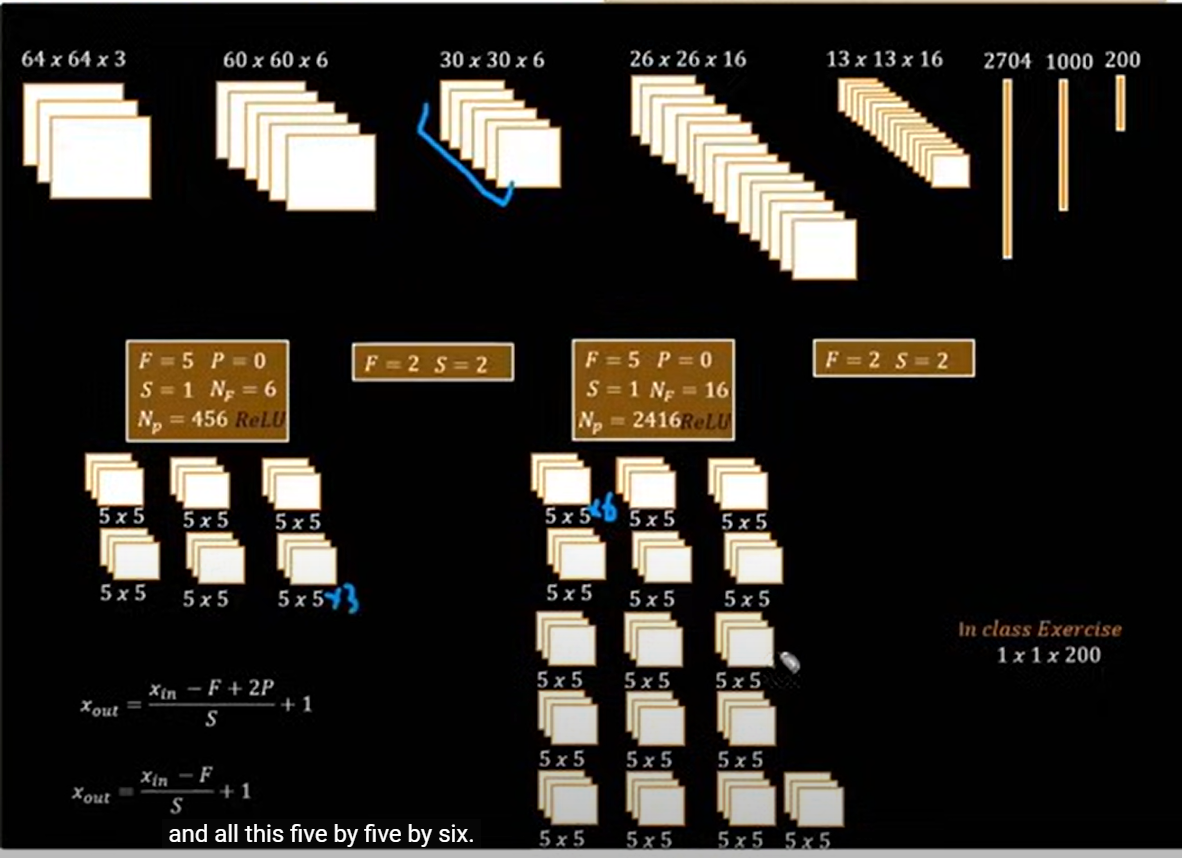

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 20, verbose = 1)
#needs a GPU it is too slow

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylable('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation_Loss'])
plt.show()

In [ ]:
train_dataset

In [ ]:
test_dataset

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

In [ ]:
model.evaluate(test_dataset)

In [ ]:
model.predict(test_dataset.take(1))[0][0]

In [ ]:
def parasite_or_not(x):
    if x < 0.5:
      return str('p')
    else:
      return str('U')

In [ ]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))